In [2]:
import pandas as pd

# train = pd.read_csv('./data/train.csv')
# test = pd.read_csv('./data/test.csv')

In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [6]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)

In [7]:
full_set = pd.concat([train,test],ignore_index=True)

In [8]:
full_set

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0.00000,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0.00000,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0.00000,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0.00000,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0.00000,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
1488024,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
1488025,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
1488026,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


In [9]:
data = []
for col in full_set.columns:
    # Defining the role
    if col == 'target':
        role = '目标标签（是否发起索赔）'
    elif col == 'id':
        role = '序列号（不属于特征）'
    else:
        role = '特征'
         
    # Defining the level
    if 'bin' in col or col == 'target':
        level = 'binary'
    elif 'cat' in col or col == 'id':
        level = 'nominal'
    elif full_set[col].dtype == 'float64':
        level = 'interval'
    elif full_set[col].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if col == 'id':
        keep = False
        
    # Defining the data type 
    dtype = full_set[col].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    col_dict = {
        '变量名称': col,
        '数据角色': role,
        '变量类型': level,
        '数据类型': dtype,
        '是否保留': keep,
    }
    data.append(col_dict)
    
meta = pd.DataFrame(data, columns=['变量名称', '数据角色', '变量类型', '数据类型', '是否保留'])
meta.set_index('变量名称', inplace=True)
meta['唯一值数量'] = [full_set.replace(-1,np.nan)[col].value_counts().shape[0] if col in meta[(meta['变量类型'] != 'interval') & (meta['是否保留'])].index else '不统计' for col in meta.index]
meta['缺失值数量'] = [str(full_set[full_set[col] == -1][col].count()) + f'({round(full_set[full_set[col] == -1][col].count()/full_set.shape[0]*100,2)}%)' for col in meta.index]
meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%)
target,目标标签（是否发起索赔）,binary,float64,True,2,0(0.0%)
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%)
ps_ind_02_cat,特征,nominal,int64,True,4,523(0.04%)
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%)
ps_ind_04_cat,特征,nominal,int64,True,2,228(0.02%)
ps_ind_05_cat,特征,nominal,int64,True,7,14519(0.98%)
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%)
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%)


In [10]:
pd.DataFrame(
    {
        '总数':meta.groupby(['数据角色','变量类型']).size()
    }
).reset_index()

,数据角色,变量类型,总数
0,序列号（不属于特征）,nominal,1
1,特征,binary,17
2,特征,interval,10
3,特征,nominal,14
4,特征,ordinal,16
5,目标标签（是否发起索赔）,binary,1


In [11]:
stats = full_set[meta[(meta['变量类型'] == 'interval')].index].describe();
stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000,1488028.00000
mean,0.61103,0.43959,0.55148,0.37995,0.81349,0.27636,3.06735,0.44968,0.45011,0.44997
std,0.28768,0.40451,0.79382,0.05836,0.22470,0.35696,0.72995,0.28721,0.28718,0.28721
min,0.00000,0.00000,-1.00000,-1.00000,0.25062,-1.00000,0.00000,0.00000,0.00000,0.00000
25%,0.40000,0.20000,0.52500,0.31623,0.67101,0.33392,2.82843,0.20000,0.20000,0.20000
50%,0.70000,0.30000,0.72111,0.37417,0.76604,0.36878,3.31662,0.40000,0.50000,0.50000
75%,0.90000,0.60000,1.00156,0.40000,0.90614,0.39648,3.60555,0.70000,0.70000,0.70000
max,0.90000,1.80000,4.42352,1.26491,4.03130,0.63640,3.74166,0.90000,0.90000,0.90000


In [12]:
stats.loc['min',:][stats.loc['min',:] == -1].index

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [13]:
stats.columns[stats.loc['std',:].argmin()]

'ps_car_12'

In [14]:
stats.columns[stats.loc['max',:]>4]

Index(['ps_reg_03', 'ps_car_13'], dtype='object')

In [15]:
calc_col_interval = [col for col in meta[(meta['变量类型'] == 'interval')].index if 'calc' in col];calc_col_interval

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [16]:
full_set[calc_col_interval].describe()

,ps_calc_01,ps_calc_02,ps_calc_03
count,1488028.00000,1488028.00000,1488028.00000
mean,0.44968,0.45011,0.44997
std,0.28721,0.28718,0.28721
min,0.00000,0.00000,0.00000
25%,0.20000,0.20000,0.20000
50%,0.40000,0.50000,0.50000
75%,0.70000,0.70000,0.70000
max,0.90000,0.90000,0.90000


In [17]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
train.target.describe()

count   595212.00000
mean         0.03645
std          0.18740
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: target, dtype: float64

<AxesSubplot:>

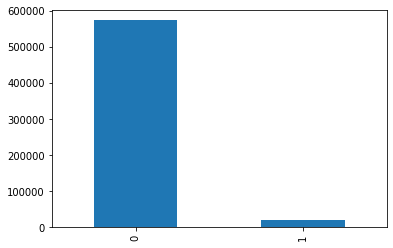

In [18]:
train.target.value_counts().plot(kind = 'bar')

不发起索赔: 573518
发起索赔: 21694
比例: 26.44 : 1


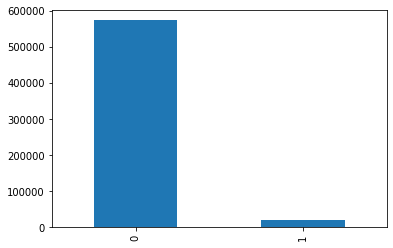

In [19]:
import numpy as np
import pandas as pd

train = pd.read_csv('./data/train.csv')

target_count = train.target.value_counts()
print('不发起索赔:', target_count[0])
print('发起索赔:', target_count[1])
print('比例:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar');

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [23]:
def undersampling(df, desired_prop_rate = 0.15, plot = True):
    # 获取target=0和1的index
    idx_class_0 = df[df.target == 0].index
    idx_class_1 = df[df.target == 1].index
    
    # 获取target=0和1的个数
    count_class_0 = len(idx_class_0)
    count_class_1 = len(idx_class_1)
    
    # 根据上面的公式计算undersampling rate
    undersampling_rate = ((1-desired_prop_rate)*count_class_1)/(count_class_0*desired_prop_rate)
    undersampled_majority_size = int(undersampling_rate*count_class_0)
    
    print(f"关于target=0的欠采样比率为:【{undersampling_rate}】")
    print(f"在欠采样之后，target=0的数量为：【{undersampled_majority_size}】")
    
    
    from sklearn.utils import shuffle
    # 用shuffle函数对target=0的所有数据打乱抽样，seed=100,抽样数为刚刚计算的值
    undersampled_idx = shuffle(idx_class_0, random_state=100, n_samples=undersampled_majority_size)
    
    # 把undersampling之后的idx和之前的target=1的idx合并，并在train里面根据idx把数据索引出来
    idx_total = list(undersampled_idx)+list(idx_class_1)
    
    df = df.loc[idx_total].reset_index(drop=True)
    
    # 如果plot参数设置为True，画出欠采样之后的target分布柱形图。
    if plot == True:
        import seaborn as sns
        sns.countplot(x = df.target)
        # print(df.target.value_counts()/df.shape[0])
    
    return df

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
144622,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
144623,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
144624,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


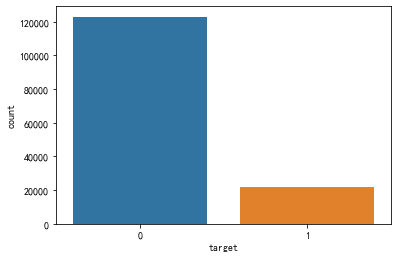

In [24]:
undersampling(df = train)

In [25]:
train_balanced = undersampling(df = train,plot=False)

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


In [26]:
train_balanced.to_csv('./data/train_balanced.csv')

In [27]:
train_balanced = pd.read_csv('./data/train_balanced.csv',index_col=0)

### 数据QC

In [28]:
full_set_update = pd.concat([train_balanced,test],ignore_index=True)

In [29]:
full_set_update

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0.00000,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0.00000,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0.00000,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0.00000,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0.00000,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
1037438,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
1037439,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
1037440,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


In [30]:
# data = []
# for col in full_set_update.columns:
#     # Defining the role
#     if col == 'target':
#         role = '目标标签（是否发起索赔）'
#     elif col == 'id':
#         role = '序列号（不属于特征）'
#     else:
#         role = '特征'
         
#     # Defining the level
#     if 'bin' in col or col == 'target':
#         level = 'binary'
#     elif 'cat' in col or col == 'id':
#         level = 'nominal'
#     elif full_set_update[col].dtype == 'float64':
#         level = 'interval'
#     elif full_set_update[col].dtype == 'int64':
#         level = 'ordinal'
        
#     # Initialize keep to True for all variables except for id
#     keep = True
#     if col == 'id':
#         keep = False
        
#     # Defining the data type 
#     dtype = full_set_update[col].dtype
    
#     # Creating a Dict that contains all the metadata for the variable
#     col_dict = {
#         '变量名称': col,
#         '数据角色': role,
#         '变量类型': level,
#         '数据类型': dtype,
#         '是否保留': keep,
#     }
#     data.append(col_dict)
    
# meta = pd.DataFrame(data, columns=['变量名称', '数据角色', '变量类型', '数据类型', '是否保留'])
# meta.set_index('变量名称', inplace=True)
# meta['唯一值数量'] = [full_set_update.replace(-1,np.nan)[col].value_counts().shape[0] if col in meta[(meta['变量类型'] != 'interval') & (meta['是否保留'])].index else '不统计' for col in meta.index]
# meta['缺失值数量'] = [str(full_set_update[full_set_update[col] == -1][col].count()) + f'({round(full_set_update[full_set_update[col] == -1][col].count()/full_set_update.shape[0]*100,2)}%)' for col in meta.index]
# meta

In [31]:
# meta.to_csv('./data/metadata.csv')

In [32]:
metadata = pd.read_csv('./data/metadata.csv',index_col=0)

In [33]:
metadata

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
id,序列号（不属于特征）,nominal,float64,False,不统计,0(0.0%)
target,目标标签（是否发起索赔）,binary,float64,True,2,0(0.0%)
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%)
ps_ind_02_cat,特征,nominal,int64,True,4,387(0.04%)
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%)
ps_ind_04_cat,特征,nominal,int64,True,2,193(0.02%)
ps_ind_05_cat,特征,nominal,int64,True,7,10314(0.99%)
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%)
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%)


In [36]:
# train_balanced_update = train_balanced.copy()

full_set_update_copy = full_set_update.copy()

In [37]:
full_set_update_copy

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0.00000,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0.00000,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0.00000,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0.00000,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0.00000,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
1037438,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
1037439,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
1037440,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


In [38]:
missing_summary = pd.DataFrame(sorted(zip(metadata.index,metadata['变量类型'],metadata['缺失值数量']),key = lambda x: int(x[2].split('(')[0]),reverse=True),columns = ['变量名','变量类型','缺失值数量']).iloc[:12,:]
missing_cols_top3 = missing_summary.iloc[:3,0].tolist()
missing_summary

,变量名,变量类型,缺失值数量
0,ps_car_03_cat,nominal,715370(68.96%)
1,ps_car_05_cat,nominal,464241(44.75%)
2,ps_reg_03,interval,186910(18.02%)
3,ps_car_14,interval,74374(7.17%)
4,ps_car_07_cat,nominal,20480(1.97%)
5,ps_ind_05_cat,nominal,10314(0.99%)
6,ps_car_09_cat,nominal,1042(0.1%)
7,ps_ind_02_cat,nominal,387(0.04%)
8,ps_car_01_cat,nominal,213(0.02%)
9,ps_ind_04_cat,nominal,193(0.02%)


In [39]:
missing_cols_top3

['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03']

In [40]:
missing_cols = missing_summary.iloc[:,0]

In [41]:
missing_cols

0     ps_car_03_cat
1     ps_car_05_cat
2         ps_reg_03
3         ps_car_14
4     ps_car_07_cat
5     ps_ind_05_cat
6     ps_car_09_cat
7     ps_ind_02_cat
8     ps_car_01_cat
9     ps_ind_04_cat
10    ps_car_02_cat
11        ps_car_11
Name: 变量名, dtype: object

In [42]:
cols_to_drop=['ps_car_03_cat','ps_car_05_cat']

In [43]:
metadata.loc[cols_to_drop,'是否保留'] = False

In [44]:
full_set_update[['ps_reg_03','ps_car_14']].replace(-1,np.nan).describe()

,ps_reg_03,ps_car_14
count,850532.00000,963068.00000
mean,0.89566,0.37472
std,0.34625,0.04571
min,0.06124,0.10954
25%,0.63394,0.35043
50%,0.80312,0.37350
75%,1.08772,0.39850
max,4.42352,0.63640


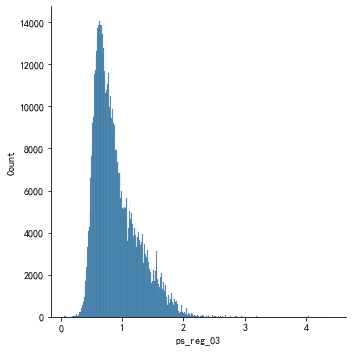

In [45]:
sns.displot(full_set_update.ps_reg_03.replace(-1,np.nan))

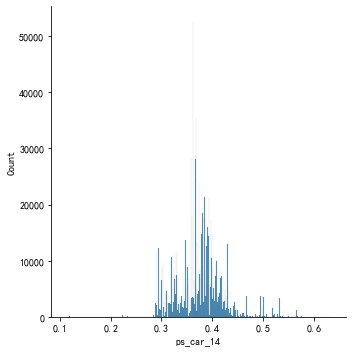

In [46]:
sns.displot(full_set_update.ps_car_14.replace(-1,np.nan))

In [47]:
missing_cat_cols = missing_cols[4:].tolist()

In [48]:
missing_cat_cols

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11']

<Figure size 432x288 with 0 Axes>

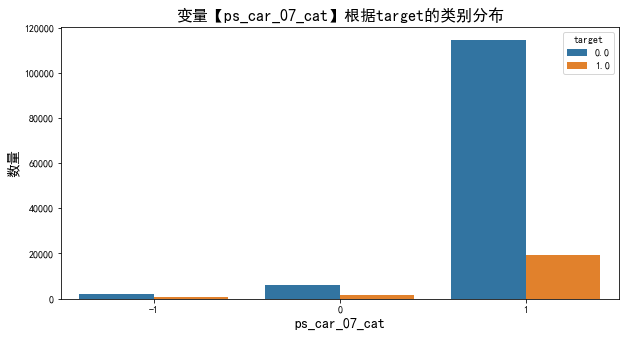

<Figure size 432x288 with 0 Axes>

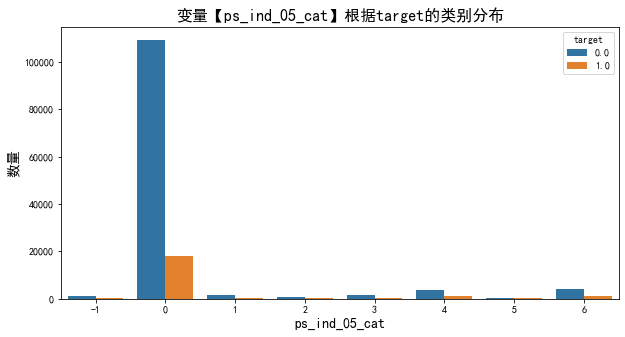

<Figure size 432x288 with 0 Axes>

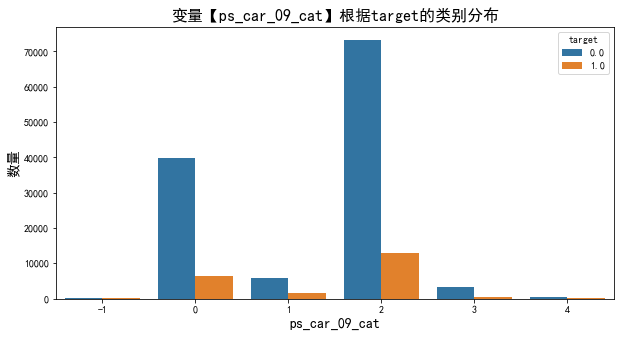

<Figure size 432x288 with 0 Axes>

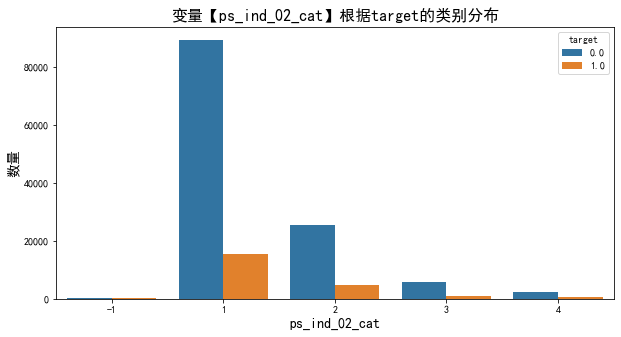

<Figure size 432x288 with 0 Axes>

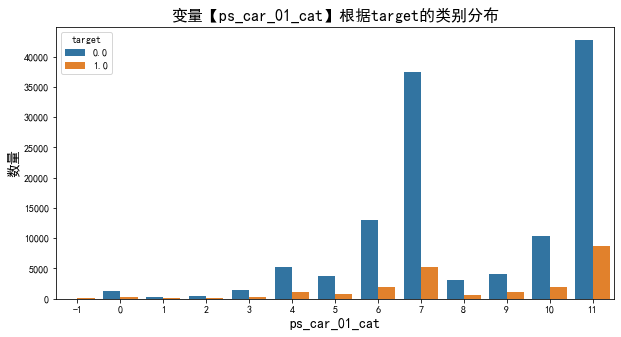

<Figure size 432x288 with 0 Axes>

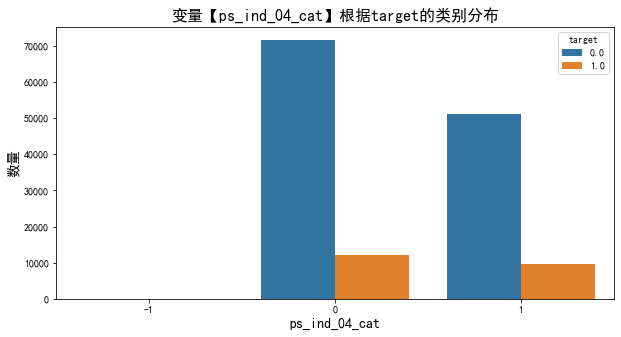

<Figure size 432x288 with 0 Axes>

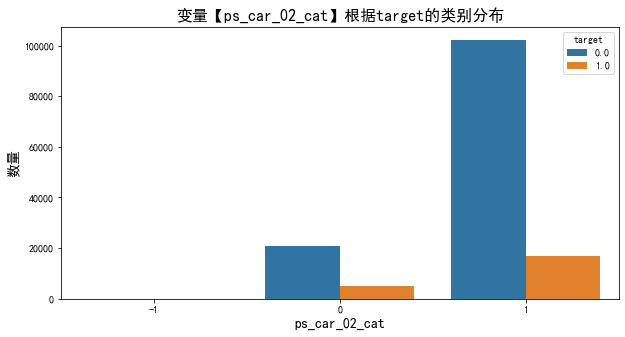

<Figure size 432x288 with 0 Axes>

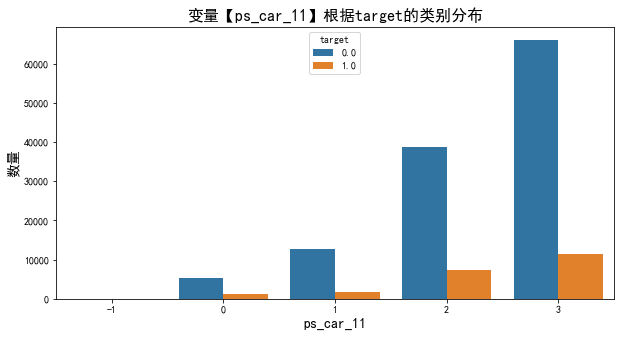

In [49]:
for col in missing_cat_cols:
    
    # 简历画布
    plt.figure()
    # 设置子画布
    fig, ax = plt.subplots(figsize=(10,5))
    
    # countplot
    sns.countplot(x = col,hue = 'target', data = full_set_update)
    
    # 设置横轴纵轴标签以及标题
    plt.ylabel('数量', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.title(f"变量【{col}】根据target的类别分布",fontsize = 16)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

### 缺失值填充

In [50]:
from sklearn.impute import SimpleImputer # 这里使用SimpleImputer，参考：https://zhuanlan.zhihu.com/p/83173703

In [51]:
# 排名前2的变量我们drop掉
cols_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
#train_balanced_update.drop(cols_to_drop, inplace = True, axis = 1)

In [52]:
mean_imputer = SimpleImputer(missing_values = -1, strategy='mean',add_indicator=True)
mode_imputer = SimpleImputer(missing_values = -1, strategy='most_frequent',add_indicator=True)

In [53]:
# 众数填充 why?
full_set_update_copy['ps_reg_03']=[x[0] for x in mode_imputer.fit_transform(full_set_update_copy[['ps_reg_03']]).tolist()]

In [54]:
# 均值填充 why?
full_set_update_copy['ps_car_14']=[x[0] for x in mean_imputer.fit_transform(full_set_update_copy[['ps_car_14']]).tolist()]

In [55]:
full_set_update_copy

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0.00000,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0.00000,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0.00000,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0.00000,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0.00000,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
1037438,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
1037439,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
1037440,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


In [56]:
imp = mode_imputer.fit_transform(full_set_update_copy[missing_cat_cols])

In [57]:
full_set_update_copy[missing_cat_cols]=pd.DataFrame(imp).iloc[:,:len(missing_cat_cols)]

In [58]:
full_set_update_copy

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0.00000,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0.00000,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0.00000,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0.00000,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0.00000,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
1037438,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
1037439,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
1037440,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


In [59]:
full_set_update_copy[missing_cat_cols] = full_set_update_copy[missing_cat_cols].astype('int64')# 填充之后dtype会改变，记得改回来

### EDA

<Figure size 432x288 with 0 Axes>

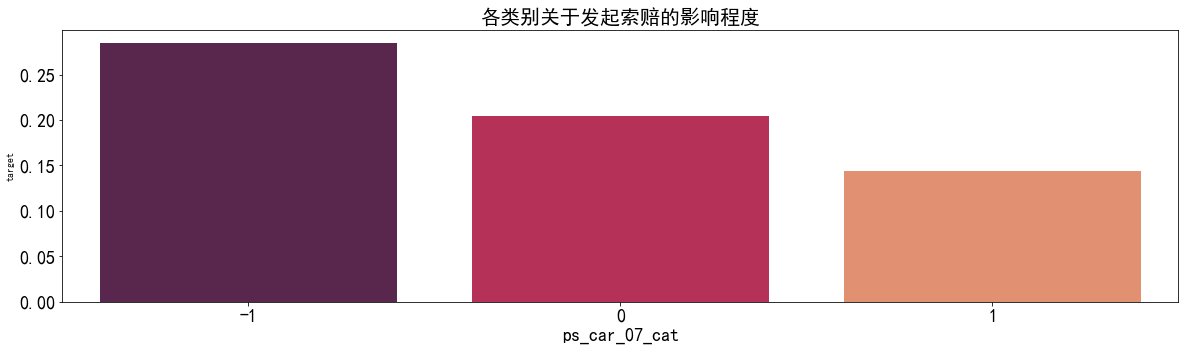

<Figure size 432x288 with 0 Axes>

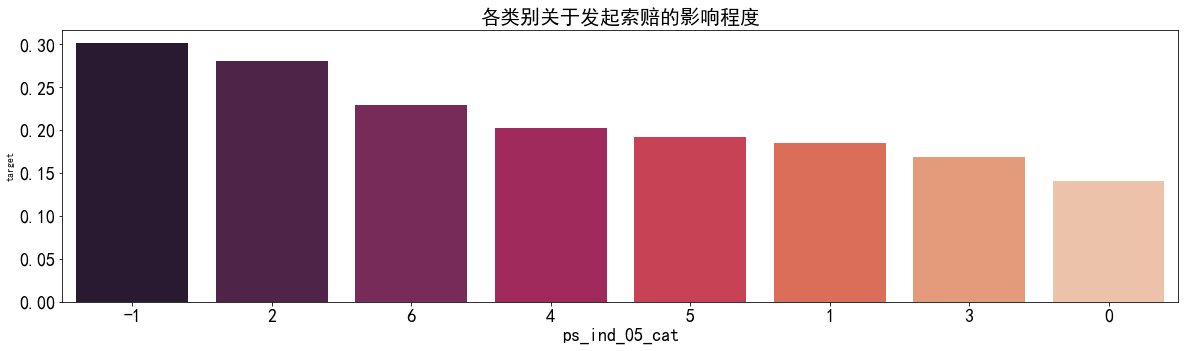

<Figure size 432x288 with 0 Axes>

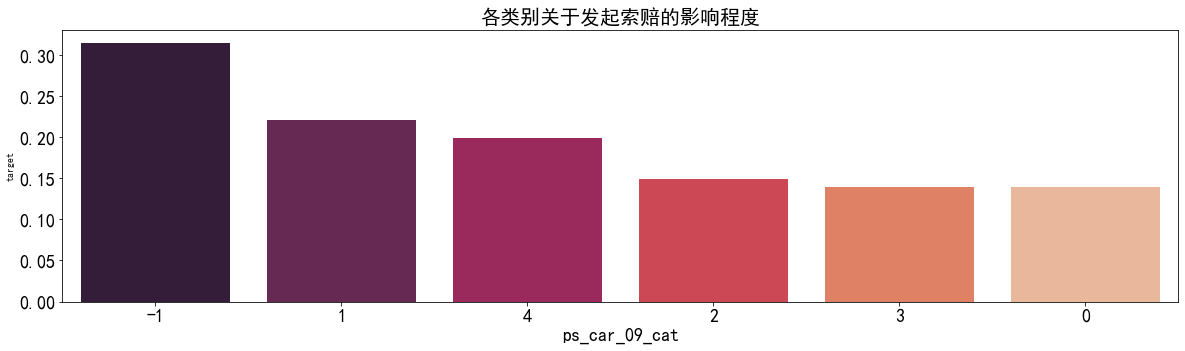

<Figure size 432x288 with 0 Axes>

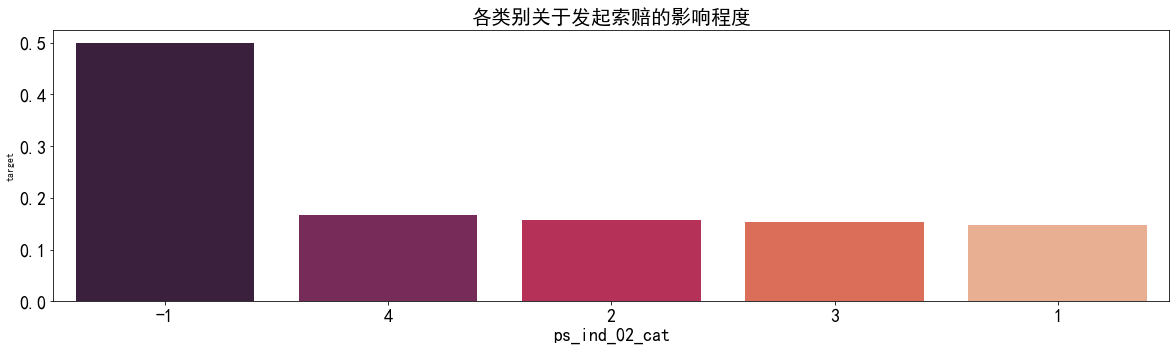

<Figure size 432x288 with 0 Axes>

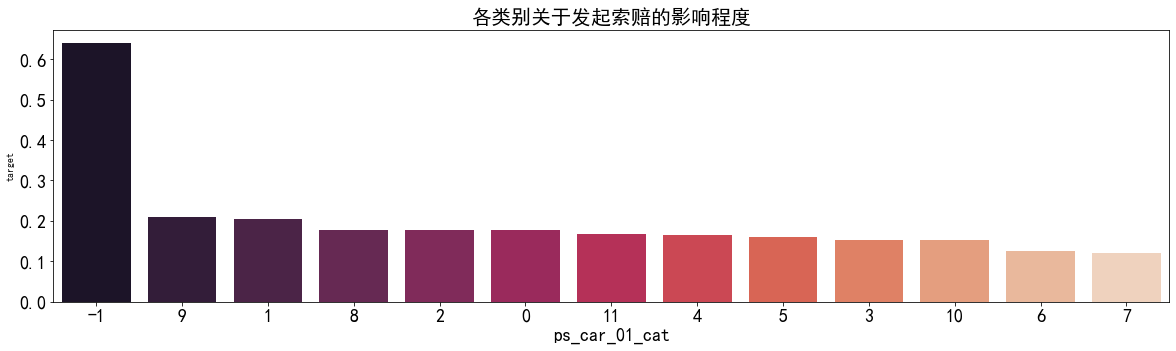

<Figure size 432x288 with 0 Axes>

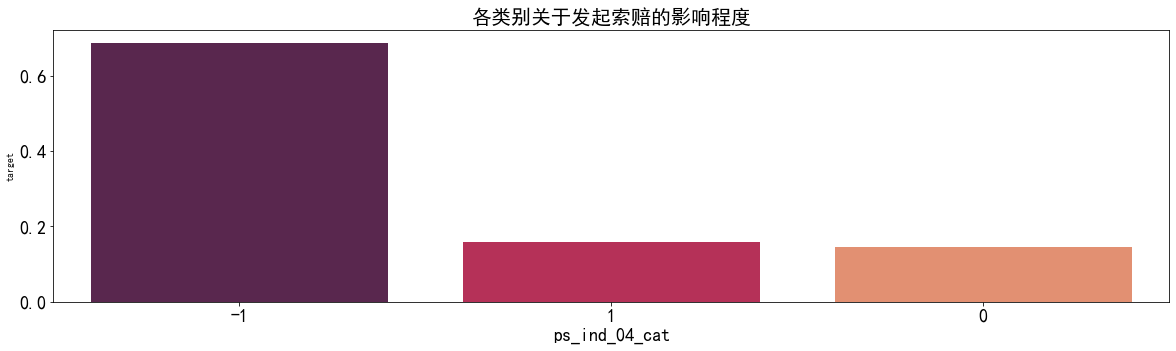

<Figure size 432x288 with 0 Axes>

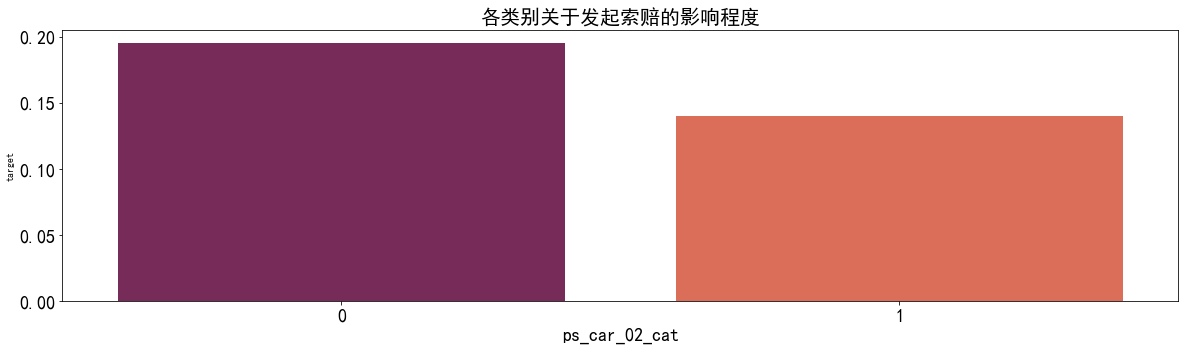

<Figure size 432x288 with 0 Axes>

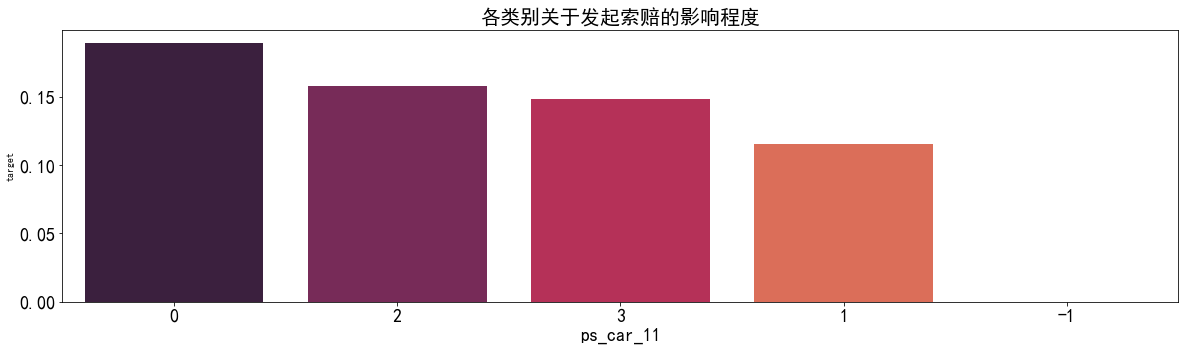

In [60]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,5))
    
    train_before_imp = full_set_update.loc[train_balanced.index]
    cat_perc = train_before_imp[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='rocket')
    plt.title('各类别关于发起索赔的影响程度', fontsize=20)
    plt.xlabel(col, fontsize=18)
    #plt.ylabel('发起索赔占比', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

<Figure size 432x288 with 0 Axes>

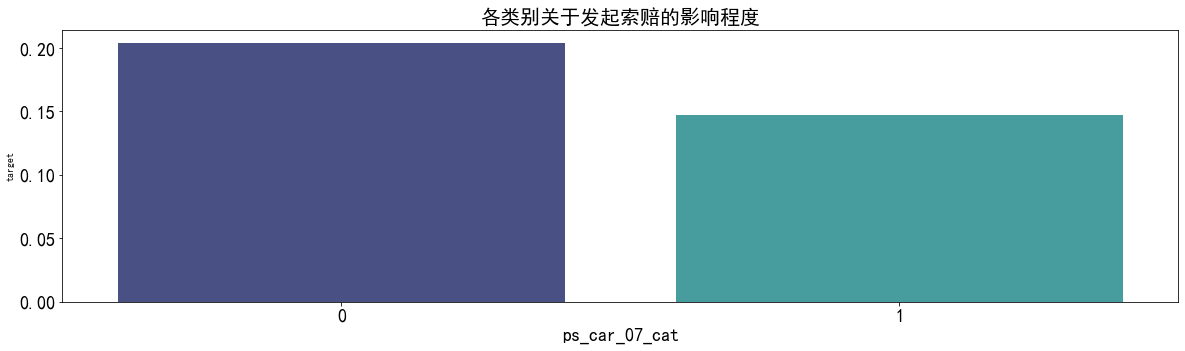

<Figure size 432x288 with 0 Axes>

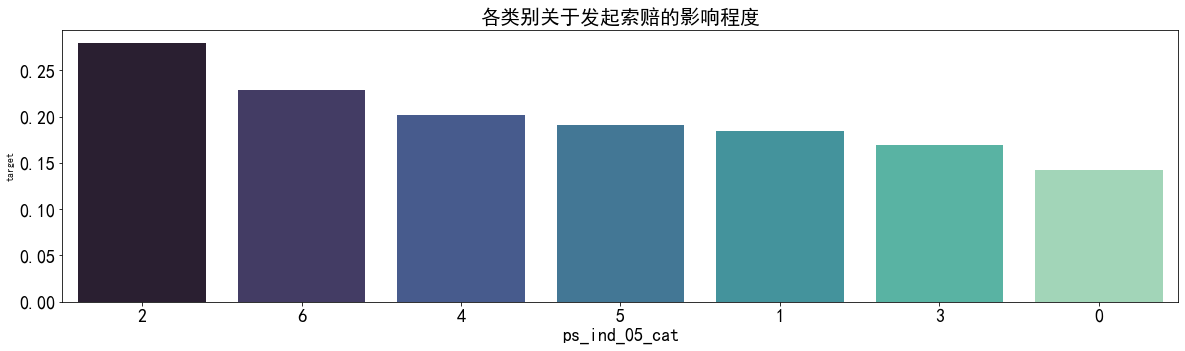

<Figure size 432x288 with 0 Axes>

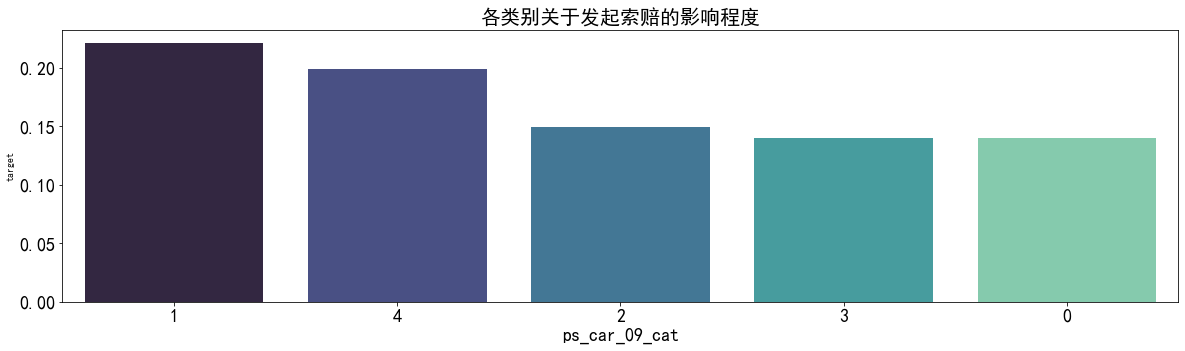

<Figure size 432x288 with 0 Axes>

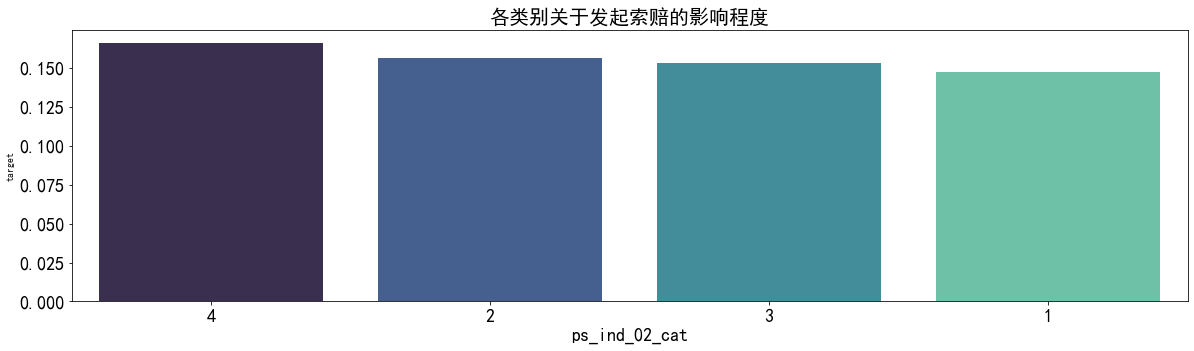

<Figure size 432x288 with 0 Axes>

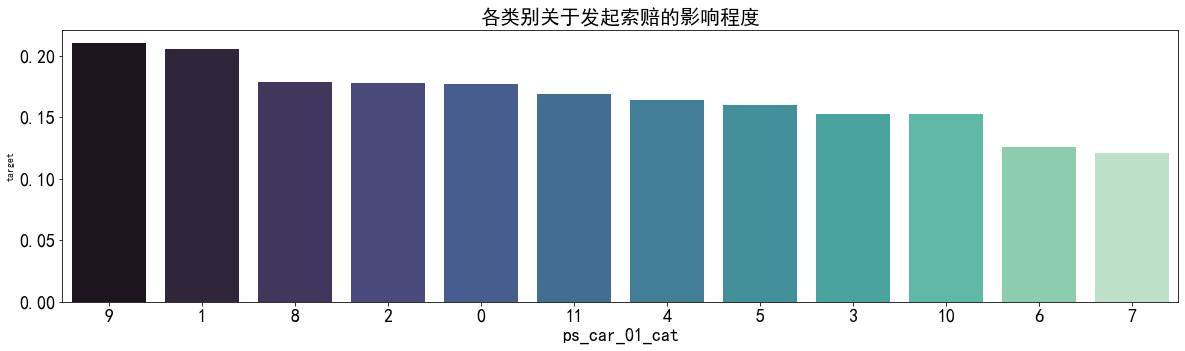

<Figure size 432x288 with 0 Axes>

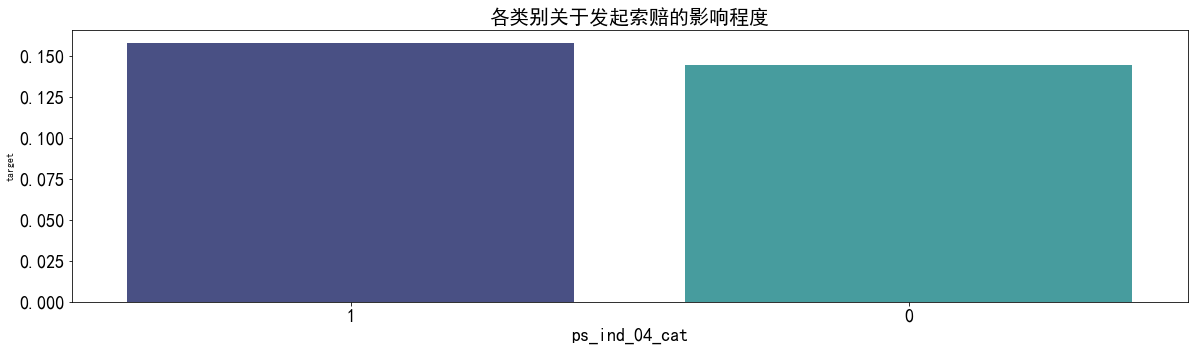

<Figure size 432x288 with 0 Axes>

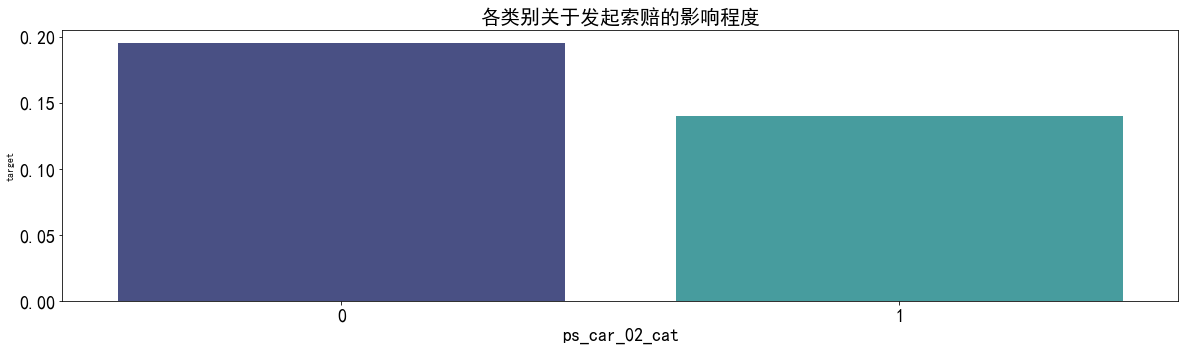

<Figure size 432x288 with 0 Axes>

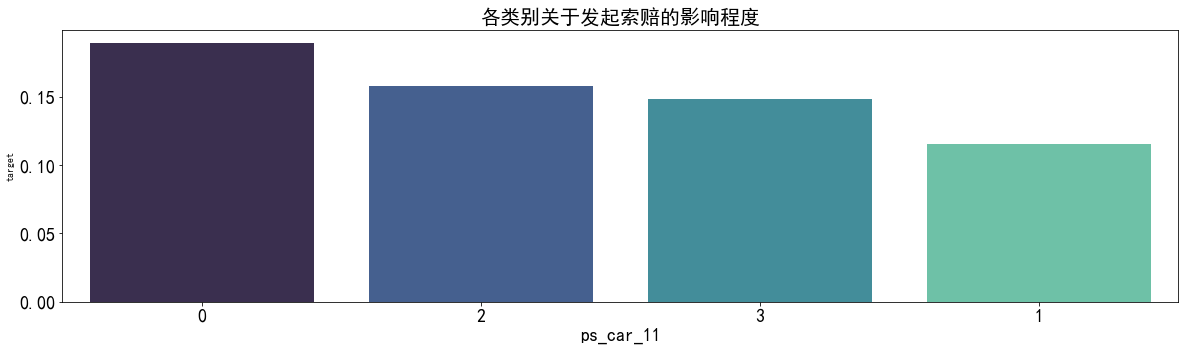

In [61]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,5))

    train_after_imp = full_set_update_copy.loc[train_balanced.index]
    cat_perc = train_after_imp[[col, 'target']].groupby([col],as_index=False).mean()  
    # train_balanced换成了train_balanced_update(去除缺失值之后)
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='mako')
    plt.title('各类别关于发起索赔的影响程度', fontsize=20)
    plt.xlabel(col, fontsize=18)
    #plt.ylabel('发起索赔占比', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

In [62]:
missing_cat_cols

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11']

In [63]:
full_set_update_copy[missing_cat_cols[:6]]=pd.DataFrame(mode_imputer.inverse_transform(imp)).iloc[:,:6].astype('int64')

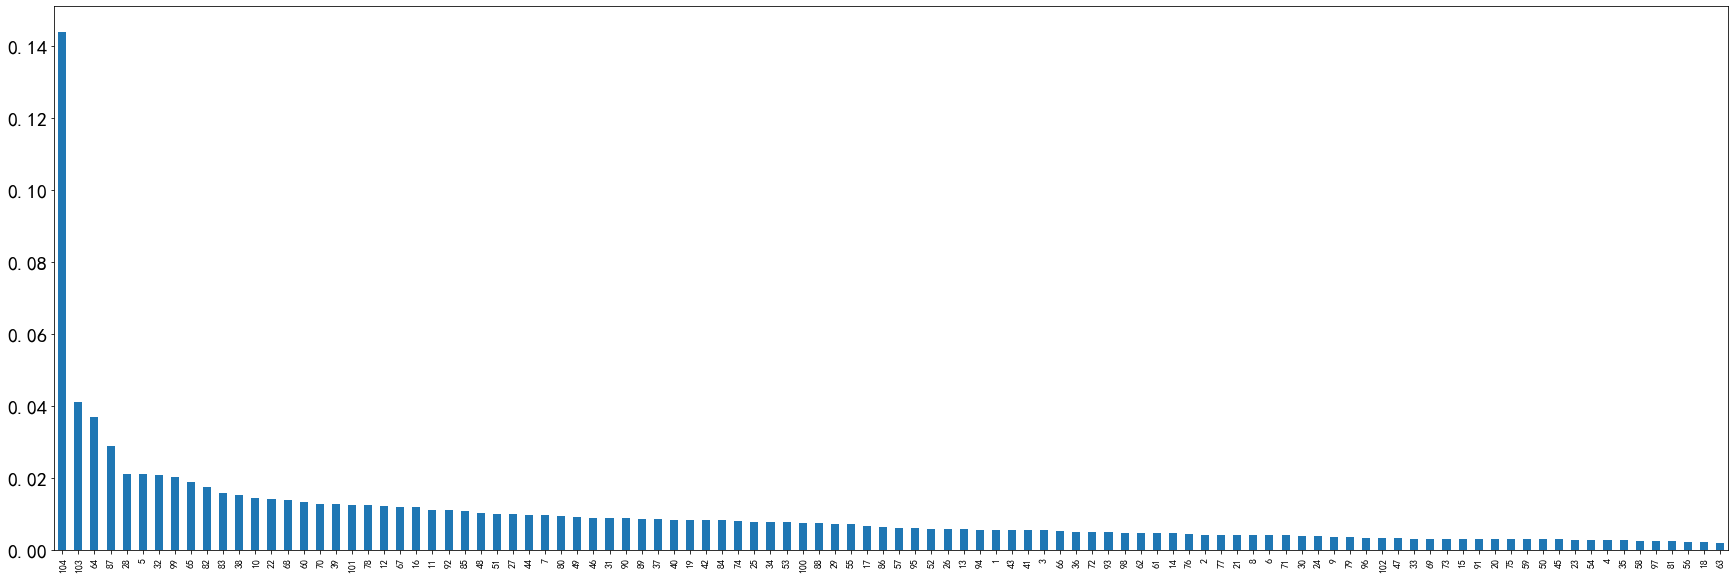

In [64]:
(full_set_update_copy.ps_car_11_cat.value_counts()/full_set_update_copy.shape[0]).plot(kind='bar',figsize = [30,10])
plt.tick_params(axis='y', which='major', labelsize=20)

In [65]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # 集散这一列关于target的group mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # 平滑
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # 计算所有target的mean
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # 如果某一类别的值的个数特别多，比如104这一类就有21255行，那么我们就要削减其关于target的mean的权值。
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # 分别对train和test计算mean
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [66]:
train_encoded, test_encoded = target_encode(train_balanced["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train_balanced.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [67]:
train = full_set_update_copy.loc[train_balanced.index]

In [68]:
test = full_set_update_copy.loc[test.index]

In [69]:
train["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

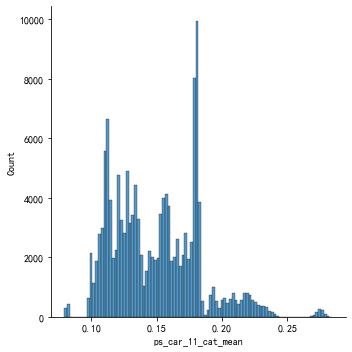

In [70]:
sns.displot(train_encoded)

In [71]:
cols_to_drop.append('ps_car_11_cat')

In [72]:
cols_to_drop

['ps_car_03_cat', 'ps_car_05_cat', 'ps_car_11_cat']

In [73]:
missing_cols

0     ps_car_03_cat
1     ps_car_05_cat
2         ps_reg_03
3         ps_car_14
4     ps_car_07_cat
5     ps_ind_05_cat
6     ps_car_09_cat
7     ps_ind_02_cat
8     ps_car_01_cat
9     ps_ind_04_cat
10    ps_car_02_cat
11        ps_car_11
Name: 变量名, dtype: object

In [74]:
def meta(raw_data, processed_data=None, cols_to_drop = [], keep_missing = True):
    """
    raw_data: raw data obtained
    data_processed: data after preprocessing
    cols_to_drop: excluded cols that contain too many missing values or we dont use
    keep_missing: True if we find we dont need to eliminate missing values after imputation
    """
    data = []
    if processed_data is not None:
        df = processed_data.copy()
    else:
        df = raw_data
    for col in df.columns:
        # Defining the role
        if col == 'target':
            role = '目标标签（是否发起索赔）'
        elif col == 'id':
            role = '序列号（不属于特征）'
        else:
            role = '特征'

        # 加入ratio变量
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col[-3:] or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() > 1:
            level = 'interval'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() <= 1:
            level = 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id' or col in cols_to_drop:
            keep = False

        # Defining the data type 
        dtype = df[col].dtype
        
        # 定义唯⼀值数量
# 定义唯⼀值数量
        if col == 'id' or df[col].dtype == 'float64':
            uniq = '不统计'
        else:
            if keep_missing == True:
                uniq = train[col].nunique()
            else:
                uniq = train[col].replace({-1:np.nan}).nunique()

        # 定义缺失值
        n_missing = sum(df[col] == -1)
        missing = f'{n_missing}({round(n_missing*100/len(train),2)}%)'
    

        col_dict = {
            '变量名称': col,
            '数据角色': role,
            '变量类型': level,
            '数据类型': dtype,
            '是否保留': keep,
            '唯一值数量': uniq,
            '缺失值数量': missing
        }
        data.append(col_dict)
    
    meta = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta.set_index('变量名称', inplace=True)
    
    missing_cols = [col for col in raw_data.columns if raw_data[col].min() == -1]
    meta['缺失值处理'] = ['无缺失值' if col not in missing_cols
        else '已去除' if col in cols_to_drop
        else '保留缺失值' if meta.loc[col,'缺失值数量'][0] != '0' 
        else '已填充' for col in meta.index]

    
    return meta

In [75]:
final_meta = meta(raw_data = full_set_update, 
                  processed_data = full_set_update_copy, 
                  cols_to_drop = cols_to_drop, 
                  keep_missing = True)
final_meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量,缺失值处理
变量名称,,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%),无缺失值
target,目标标签（是否发起索赔）,binary,float64,True,不统计,0(0.0%),无缺失值
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%),无缺失值
ps_ind_02_cat,特征,nominal,int64,True,5,387(0.27%),保留缺失值
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%),无缺失值
ps_ind_04_cat,特征,nominal,int64,True,3,193(0.13%),保留缺失值
ps_ind_05_cat,特征,nominal,int64,True,8,10314(7.13%),保留缺失值
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%),无缺失值
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%),无缺失值


In [76]:
final_meta.to_csv('./data/final_meta.csv')

In [77]:
train.to_csv('./data/train_df.csv')
test.to_csv('./data/test_df.csv')

## 特征工程&数据建模

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [79]:
train = pd.read_csv('./data/train_df.csv',index_col=0,dtype={'id': np.int32, 'target': np.int8})

In [80]:
test = pd.read_csv('./data/test_df.csv',index_col=0,dtype={'id': np.int32})

In [81]:
test.drop('target',axis=1,inplace=True)

In [82]:
full_set = pd.concat([train,test],ignore_index=True)

In [83]:
final_meta = pd.read_csv('./data/final_meta.csv',index_col=0)

In [84]:
final_meta[(final_meta.变量类型 == 'interval')|(final_meta.变量类型 == 'ratio') & (final_meta.是否保留 == True)]

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量,缺失值处理
变量名称,,,,,,,
ps_reg_01,特征,ratio,float64,True,不统计,0(0.0%),无缺失值
ps_reg_02,特征,interval,float64,True,不统计,0(0.0%),无缺失值
ps_reg_03,特征,interval,float64,True,不统计,0(0.0%),已填充
ps_car_12,特征,interval,float64,True,不统计,0(0.0%),无缺失值
ps_car_13,特征,interval,float64,True,不统计,0(0.0%),无缺失值
ps_car_14,特征,ratio,float64,True,不统计,0(0.0%),已填充
ps_car_15,特征,interval,float64,True,不统计,0(0.0%),无缺失值
ps_calc_01,特征,ratio,float64,True,不统计,0(0.0%),无缺失值
ps_calc_02,特征,ratio,float64,True,不统计,0(0.0%),无缺失值


In [85]:
continuous_cols = final_meta[(final_meta.变量类型 == 'interval')|(final_meta.变量类型 == 'ratio') & (final_meta.是否保留 == True)].index.tolist()

In [86]:
# 计算各特征的相关系数矩阵（对称）
corr_mat = full_set[continuous_cols].corr()

heatmap热力图正好作用于相关系数矩阵，可以帮我们更直观地观测总结各连续型特征之间的相关性强弱。

<AxesSubplot:>

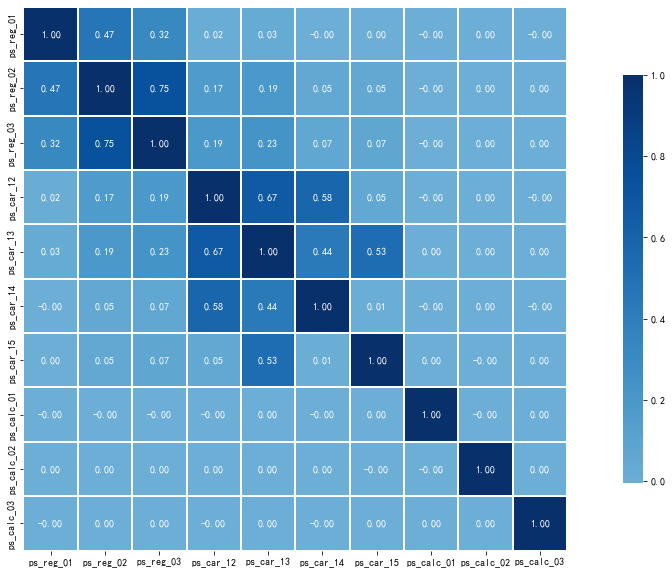

In [87]:
plt.figure(figsize = [20,10])   # 设置画布大小
sns.heatmap(data = corr_mat,    # 
            vmax=1,
            center=0,
            square=True,
           annot = True,  # 显示文字
          fmt='.2f',      # 保留两位
           cmap = 'Blues',   # 颜色
           linewidths = .3,  # 分割线宽度
           cbar_kws={"shrink": .75})

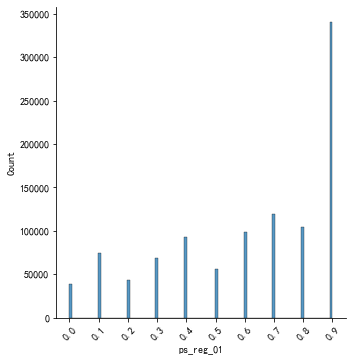

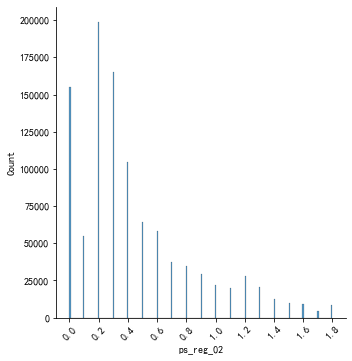

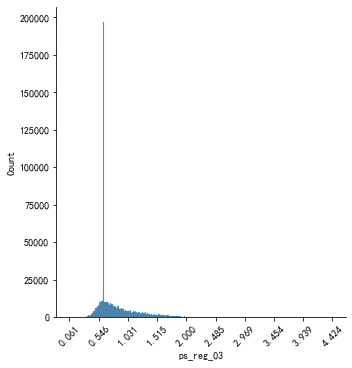

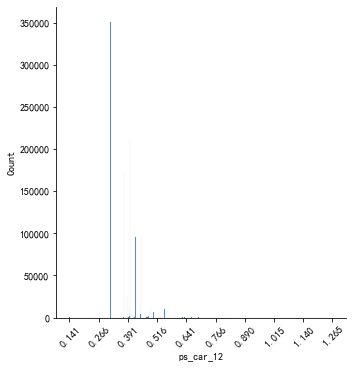

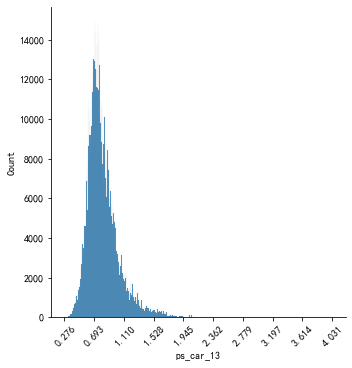

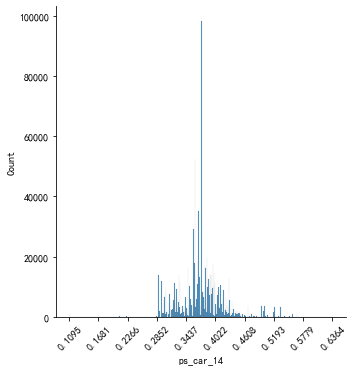

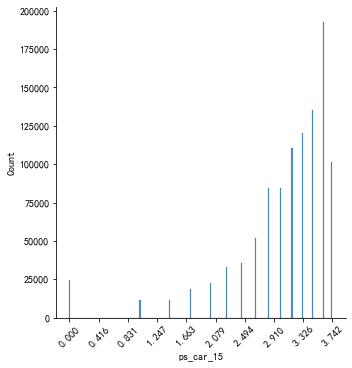

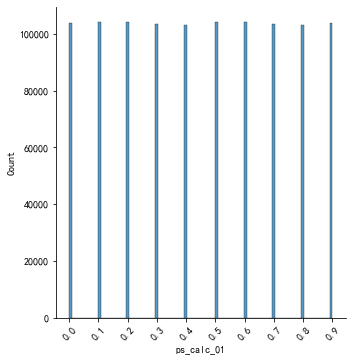

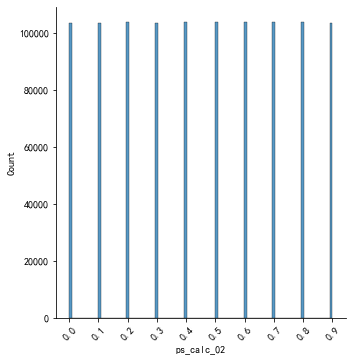

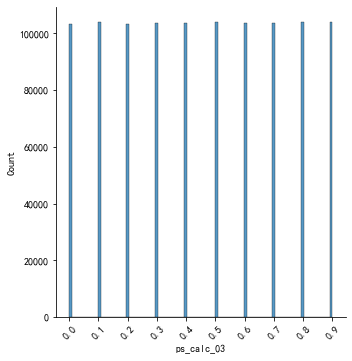

In [89]:
for col in continuous_cols:
    sns.displot(full_set[col])
    plt.xticks(ticks = np.linspace(start = full_set[col].min(),
                                  stop = full_set[col].max(),
                                  num = 10),rotation = 45)

In [90]:
def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()

    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]

    # 计算woe
    woe = np.log(bad) - np.log(good)

    # 计算iv
    iv = (bad-good)*woe

    # 计算整个特征的iv
    f_iv = iv.sum()  # 5.2958917587905745
    if verbose == True:
        print(f"根据当前的间隔数{max_intervals}，特征{feat}所计算的总information value为：{f_iv}")
        print('='*80)

    # 进行映射操作
    dic = iv.to_dict()

    iv_bins = feat_bins.map(dic)  # 连续型变量离散化

    return iv_bins.astype('float64')

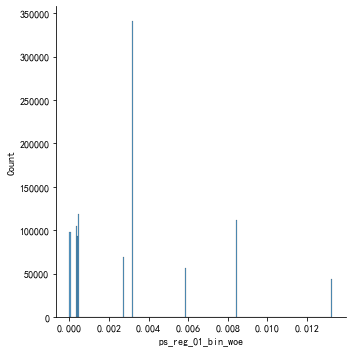

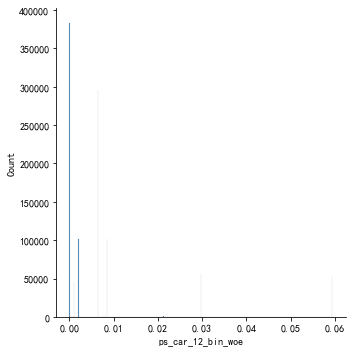

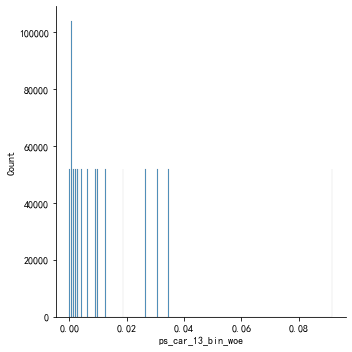

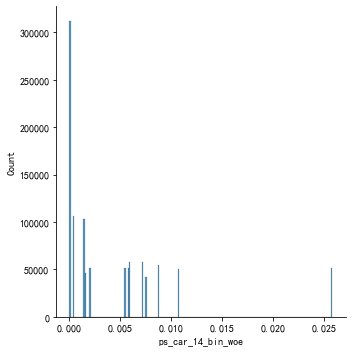

In [91]:
continuous_col_bin = ['ps_reg_01','ps_car_12','ps_car_13','ps_car_14']    # 填写


for col in continuous_col_bin:
    full_set[f"{col}_bin_woe"] = woe_iv_encoding(data = full_set, feat = col, target = 'target', max_intervals = 20)
    sns.displot(full_set[f"{col}_bin_woe"])

### 特征交互

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interactions = pd.DataFrame(data=poly.fit_transform(full_set[continuous_cols]), 
                            columns=poly.get_feature_names_out(continuous_cols))


interactions.drop(continuous_cols, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('特征交互前，训练集有 {}个变量 '.format(full_set.shape[1]))
full_set = pd.concat([full_set, interactions], axis=1)
print('特征交互后，训练集有 {}个变量'.format(full_set.shape[1]))

特征交互前，训练集有 64个变量 
特征交互后，训练集有 109个变量


In [93]:
nominal_cols = final_meta[(final_meta.变量类型 == 'nominal') & (final_meta.是否保留 == True)].index.tolist()

### 特征筛选

In [94]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
selector.fit(full_set.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = full_set.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

13 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_tar_enc', 'ps_reg_01_bin_woe', 'ps_car_12_bin_woe', 'ps_car_13_bin_woe', 'ps_car_14_bin_woe', 'ps_car_12 ps_car_14']


In [95]:
from xgboost import XGBClassifier
from xgboost import plot_importance



plt.figure(figsize = [100,20])

X = full_set.loc[train.index].drop(['id', 'target'], axis=1)
y = full_set.loc[train.index].target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<Figure size 7200x1440 with 0 Axes>

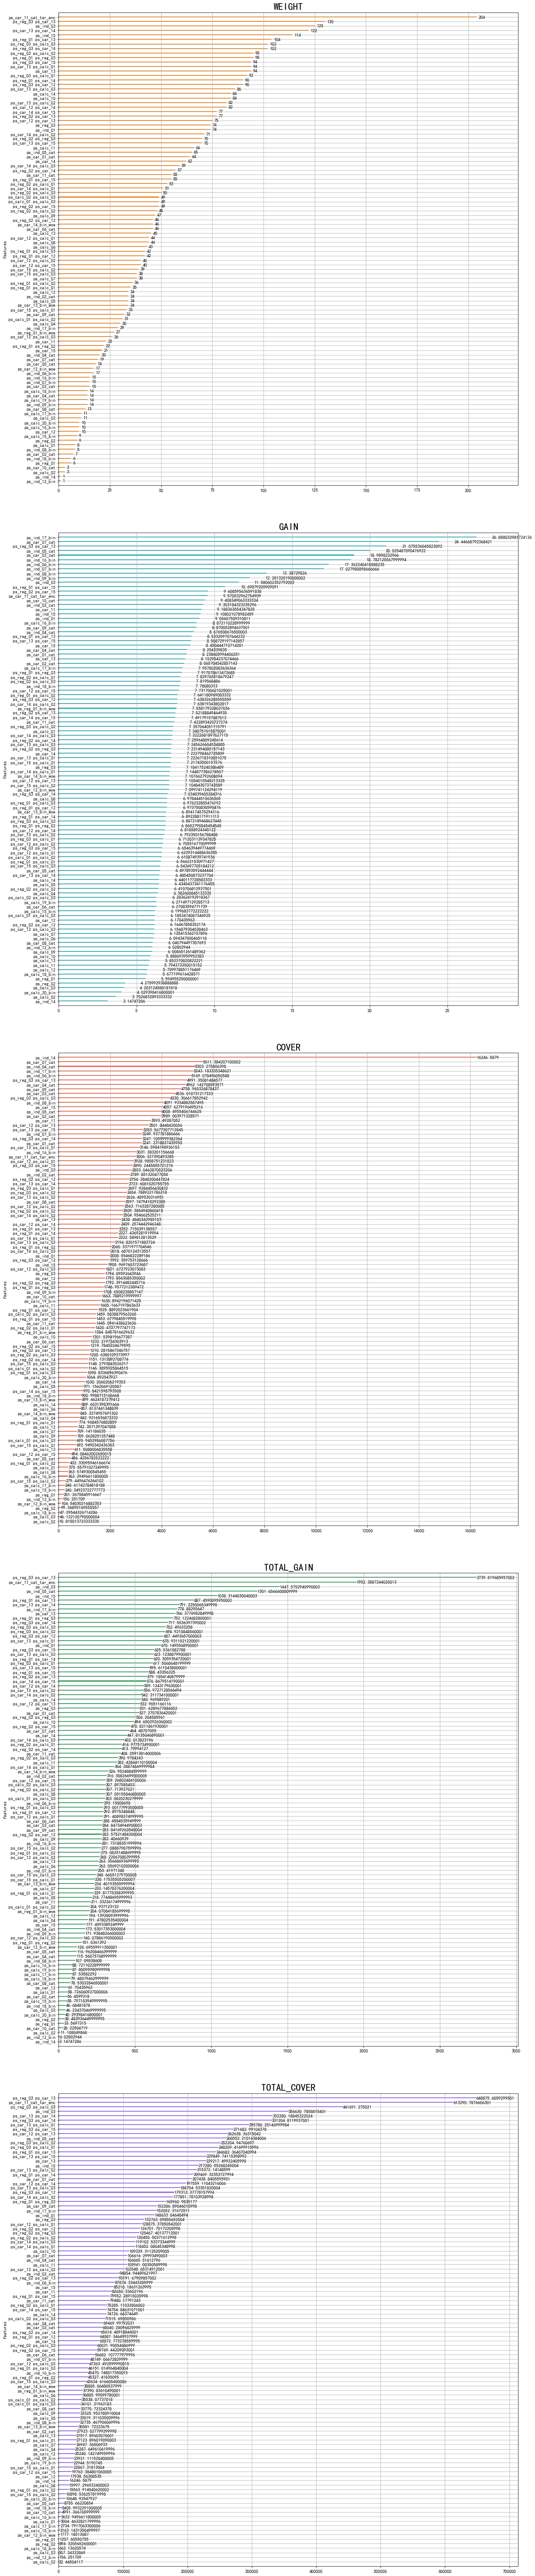

In [96]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_comp = 20
print('\nPCA执行中...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Total Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

In [ ]:
plt.figure(figsize = [12,8])

pd.Series(pca.explained_variance_ratio_).cumsum().plot()

plt.plot(range(n_comp),[0.98]*20, 'r--')
plt.xticks(ticks = range(n_comp))
plt.yticks(ticks = np.linspace(0.9,1,11))
plt.text(12,0.97,'cumulative explained var: \n0.98',fontsize = 12, color = '#20beff')

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',alpha = .7)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(
        "第一第二主成分散点分布图")
plt.xlabel("第一主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("第二主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[1] * 100.0))

In [97]:
# 特征工程的strategy作为key，对应的变量名组成的list作为value
feat_dict = {}
for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'筛选前总计：{X.shape[1]}个特征')
    n_features = model_select.transform(X.values).shape[1]
    print(f'筛选后总计： {n_features}个特征【{thres}】')
    print('#'*60)
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

筛选前总计：107个特征
筛选后总计： 54个特征【median】
############################################################
筛选前总计：107个特征
筛选后总计： 29个特征【mean】
############################################################
筛选前总计：107个特征
筛选后总计： 12个特征【1.25*mean】
############################################################


In [98]:
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())

In [99]:
final_train = full_set.loc[train.index][feat_dict['mean']+['target']]

In [100]:
final_test = full_set.loc[test.index][feat_dict['mean']]

### 数据建模

In [101]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]

交叉验证：
https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer

In [102]:
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1996)

### 参数调节

In [103]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5, 10],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [104]:
# xgb = XGBClassifier(learning_rate=0.06, n_estimators=300, objective='binary:logistic',nthread=4)

In [105]:
# from datetime import datetime
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import StratifiedKFold


# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None)
# random_search.fit(X, y)
# timer(start_time) 

In [106]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

### 优化迭代

In [107]:
# 调参之后，较优的参数组合
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50  

model = XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=4,
                        objective="binary:logistic",
                        booster = 'gbtree',
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                        nthread=4,
                     )

In [108]:
def XGB_gini(df_train,tar_enc = True):
    
    '''
    df_train: processed train data
    
    
    '''

    y = df_train.target
    X = df_train.drop('target',axis=1)
    
    
    y_valid_pred = 0*y
    y_test_pred = 0
    
    MAX_ROUNDS = 400
    OPTIMIZE_ROUNDS = False
    LEARNING_RATE = 0.07
    EARLY_STOPPING_ROUNDS = 50  
    

    from target_encoding import target_encode

    for i, (train_index, test_index) in enumerate(kf.split(df_train)):

        # 分成训练集、验证集、测试集
        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
        X_test = final_test.copy()
        print( f"\n{i}折交叉验证： ")
        
        if tar_enc == True:
            f_cat = [f for f in X.columns if '_cat' in f and 'tar_enc' not in  f]
            for f in f_cat:
                X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                                                                trn_series=X_train[f],
                                                                val_series=X_valid[f],
                                                                tst_series=X_test[f],
                                                                target=y_train,
                                                                min_samples_leaf=100,
                                                                smoothing=10,
                                                                noise_level=0
                                                                )

    #     from category_encoders.target_encoder import TargetEncoder
    #     tar_enc = TargetEncoder(cols = f_cat).fit(X_train,y_train)
    #     X_train = tar_enc.transform(X_train) # 转换训练集
    #     X_test = tar_enc.transform(X_test) # 转换测试集


            X_train.drop(f_cat,axis=1,inplace=True)
            X_valid.drop(f_cat,axis=1,inplace=True)
            X_test.drop(f_cat,axis=1,inplace=True)


        # 对于当前折，跑XGB
        if OPTIMIZE_ROUNDS:
            eval_set=[(X_valid,y_valid)]
            fit_model = model.fit( X_train, y_train, 
                                   eval_set=eval_set,
                                   eval_metric=gini_xgb,
                                   early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                   verbose=False
                                 )
            print( "  Best N trees = ", model.best_ntree_limit )
            print( "  Best gini = ", model.best_score )
        else:
            fit_model = model.fit( X_train, y_train )

        # 生成验证集的预测结果
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  normalized gini coefficent = ", eval_gini(y_valid, pred) )
        y_valid_pred.iloc[test_index] = pred

        # 累积计算测试集预测结果
        y_test_pred += fit_model.predict_proba(X_test)[:,1]

        del X_test, X_train, X_valid, y_train

    y_test_pred /= K  # 取各fold结果均值

    print( "\n整个训练集（合并）的normalized gini coefficent:" )
    print( "  final normalized gini coefficent = ", eval_gini(y, y_valid_pred) )
    
    return y_test_pred,eval_gini(y, y_valid_pred)

In [109]:
y_test_pred, gini_score = XGB_gini(df_train=final_train)


0折交叉验证： 
  normalized gini coefficent =  0.2821171009777641

1折交叉验证： 
  normalized gini coefficent =  0.2843683853161889

2折交叉验证： 
  normalized gini coefficent =  0.2949947717840058

3折交叉验证： 
  normalized gini coefficent =  0.27609624400028143

4折交叉验证： 
  normalized gini coefficent =  0.28897720779540914

整个训练集（合并）的normalized gini coefficent:
  final normalized gini coefficent =  0.28516577370988294


In [124]:
submission = pd.DataFrame()
submission['id'] = final_test.index.values
submission['target'] = y_test_pred
submission.to_csv('xgb_submit.csv', float_format='%.6f', index=False)